In [189]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
#de este DF se deben quitar duplicados
city_data_df=city_data_df.drop_duplicates("city")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [190]:
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [191]:
# Combine the data into a single dataset
PYdata= pd.merge(city_data_df,ride_data_df, on="city")

PYdata.head()
# Display the data table for preview

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [192]:
#Create the variables and the data frame to contain the information to be plotted
city_type = PYdata.groupby(["city","type"])

City_avg_fare = city_type["fare"].mean()
City_total_rides = city_type["ride_id"].count()
City_driver_count = city_type["driver_count"].mean()


city_info_df = pd.DataFrame({"Average Fare per City":City_avg_fare,
                             "Number of Rides": City_total_rides,
                             "Number of Drivers": City_driver_count
                            })
city_info_df.head()



,,Average Fare per City,Number of Rides,Number of Drivers
city,type,,,
Amandaburgh,Urban,24.641667,18,12
Barajasview,Urban,25.332273,22,26
Barronchester,Suburban,36.422500,16,11
Bethanyland,Suburban,32.956111,18,22
Bradshawfurt,Rural,40.064000,10,7


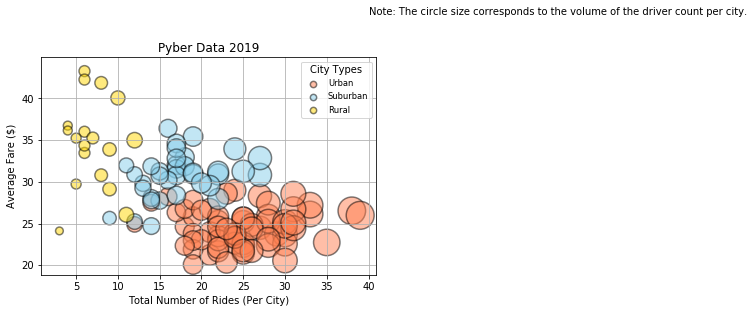

In [194]:
# Build the scatter plots for each city types

#URBAN
urban_data = PYdata.loc[PYdata["type"] == "Urban",:]
ride_group_urban= urban_data.groupby(["city","type"])
IDCount_urban = ride_group_urban["ride_id"].count()
driverCount_urban = ride_group_urban["driver_count"].count()
AVGfare_urban = ride_group_urban["fare"].mean()

#SUBURBAN
suburban_data=PYdata.loc[PYdata["type"]=="Suburban",:]
ride_group_suburban=suburban_data.groupby(["city","type"])
IDCount_suburban=ride_group_suburban["ride_id"].count()
driverCount_suburban = ride_group_suburban["driver_count"].count()
AVGfare_suburban = ride_group_suburban["fare"].mean()


#RURAL
rural_data=PYdata.loc[PYdata["type"]=="Rural",:]
ride_group_rural=rural_data.groupby(["city","type"])
IDCount_rural=ride_group_rural["ride_id"].count()
driverCount_rural = ride_group_rural["driver_count"].count()
AVGfare_rural = ride_group_rural["fare"].mean()


plt.scatter(IDCount_urban,
            AVGfare_urban,
            s=20*driverCount_urban,
            marker="o",
            color="coral",
            alpha = 0.5,
            edgecolor="black",
            linewidth = 1.5,
            label="Urban")

plt.scatter(IDCount_suburban,
            AVGfare_suburban,
            s=20*driverCount_suburban,
            marker="o",
            color="skyblue",
            alpha = 0.5,
            edgecolor="black",
            linewidth = 1.5,
            label="Suburban")

plt.scatter(IDCount_rural,
            AVGfare_rural,
            s=20*driverCount_rural,
            marker="o",
            color="gold",
            alpha = 0.5,
            edgecolor="black",
            linewidth = 1.5,
            label="Rural")

# Incorporate the other graph properties
plt.grid()

# Obtain the x and y coordinates for each of the three city types
x=City_total_rides
y=City_avg_fare

plt.title("Pyber Data 2019")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]



# Incorporate a text label regarding circle size
plt.text(40, 50,"Note: The circle size corresponds to the volume of the driver count per city.")

plt.savefig("Pyber.png")
plt.show()


## Total Fares by City Type

In [203]:
# Calculate Type Percents
city_fare= PYdata.groupby(["type"])["fare"].sum()
city_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [204]:
city_fare.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

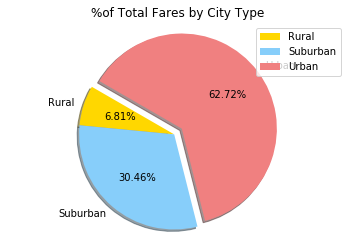

In [213]:
# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(city_fare, labels = city_fare.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = (0,0,0.1), 
        shadow = True, 
        startangle = 150)

plt.title("%of Total Fares by City Type")
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("PieChart-FaresbyCity.png")
# Show Figure
plt.show()

## Total Rides by City Type

In [217]:
# Calculate Ride Percents
city_rides=PYdata.groupby(["type"])["ride_id"].count()
city_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [218]:
city_rides.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

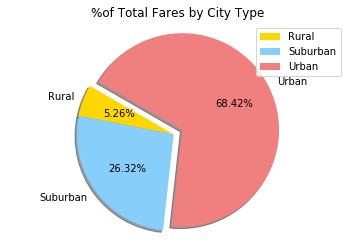

In [224]:
# Build Pie Chart
plt.pie(city_rides, labels = city_rides.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = (0,0,0.1), 
        shadow = True, 
        startangle = 150)

plt.title("%of Total Fares by City Type")
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("PieChart-RidesbyCity.png")
# Show Figure
plt.show()


## Total Drivers by City Type

In [225]:
# Calculate Driver Percents
city_drivers = PYdata.groupby(["type"])["driver_count"].mean()
city_drivers

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [226]:
city_drivers.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

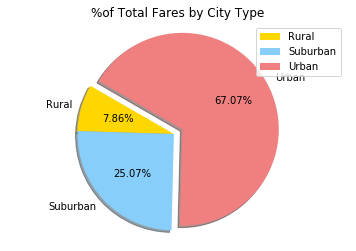

In [227]:
plt.pie(city_drivers, labels = city_drivers.index, 
        autopct = "%1.2f%%", 
        colors = colors, 
        explode = (0,0,0.1), 
        shadow = True, 
        startangle = 150)

plt.title("%of Total Fares by City Type")
plt.axis("equal")
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("PieChart-DriversbyCity.png")
# Show Figure
plt.show()